In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
data_path = "../data/Customer-Churn-Records.csv"

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
data.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1, inplace = True)

In [6]:
def resumetable(df):    
    print(f'data shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index': 'feature'})
    summary['num_NaN'] = df.isnull().sum().values
    summary['num_unique'] = df.nunique().values
    summary['first_value'] = df.iloc[0].values
    summary['second_value'] = df.iloc[1].values
    return summary

In [7]:
resumetable(data)

data shape: (10000, 15)


,feature,data type,num_NaN,num_unique,first_value,second_value
0,CreditScore,int64,0,460,619,608
1,Geography,object,0,3,France,Spain
2,Gender,object,0,2,Female,Female
3,Age,int64,0,70,42,41
4,Tenure,int64,0,11,2,1
5,Balance,float64,0,6382,0.0,83807.86
6,NumOfProducts,int64,0,4,1,1
7,HasCrCard,int64,0,2,1,0
8,IsActiveMember,int64,0,2,1,1
9,EstimatedSalary,float64,0,9999,101348.88,112542.58


We can conclude that this dataset does not include any missing values. Additionally, we identified some categorical variables (Geography, Gender, Tenure, NumberOfProducts, HasCrCard, IsActiveMember). We also need to simplify the column names for easier recognition

C:\Users\ikjoo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


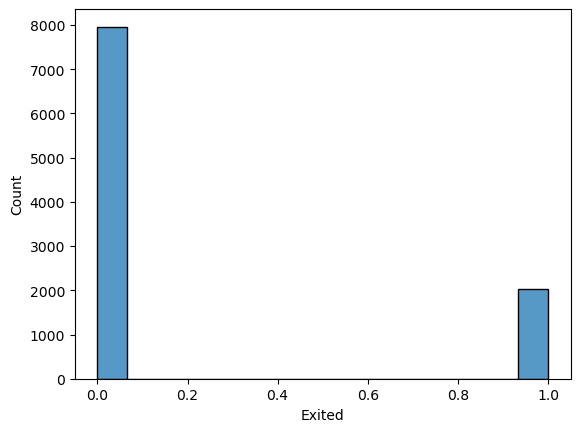

In [8]:
sns.histplot(data['Exited']);

In [9]:
data['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

We have a binary outcome here: 1 indicates that the customer left the bank, while 0 means the customer did not. The results suggest that the number of customers who left the bank is four times greater than the number of customers who did not churn based on this dataset.

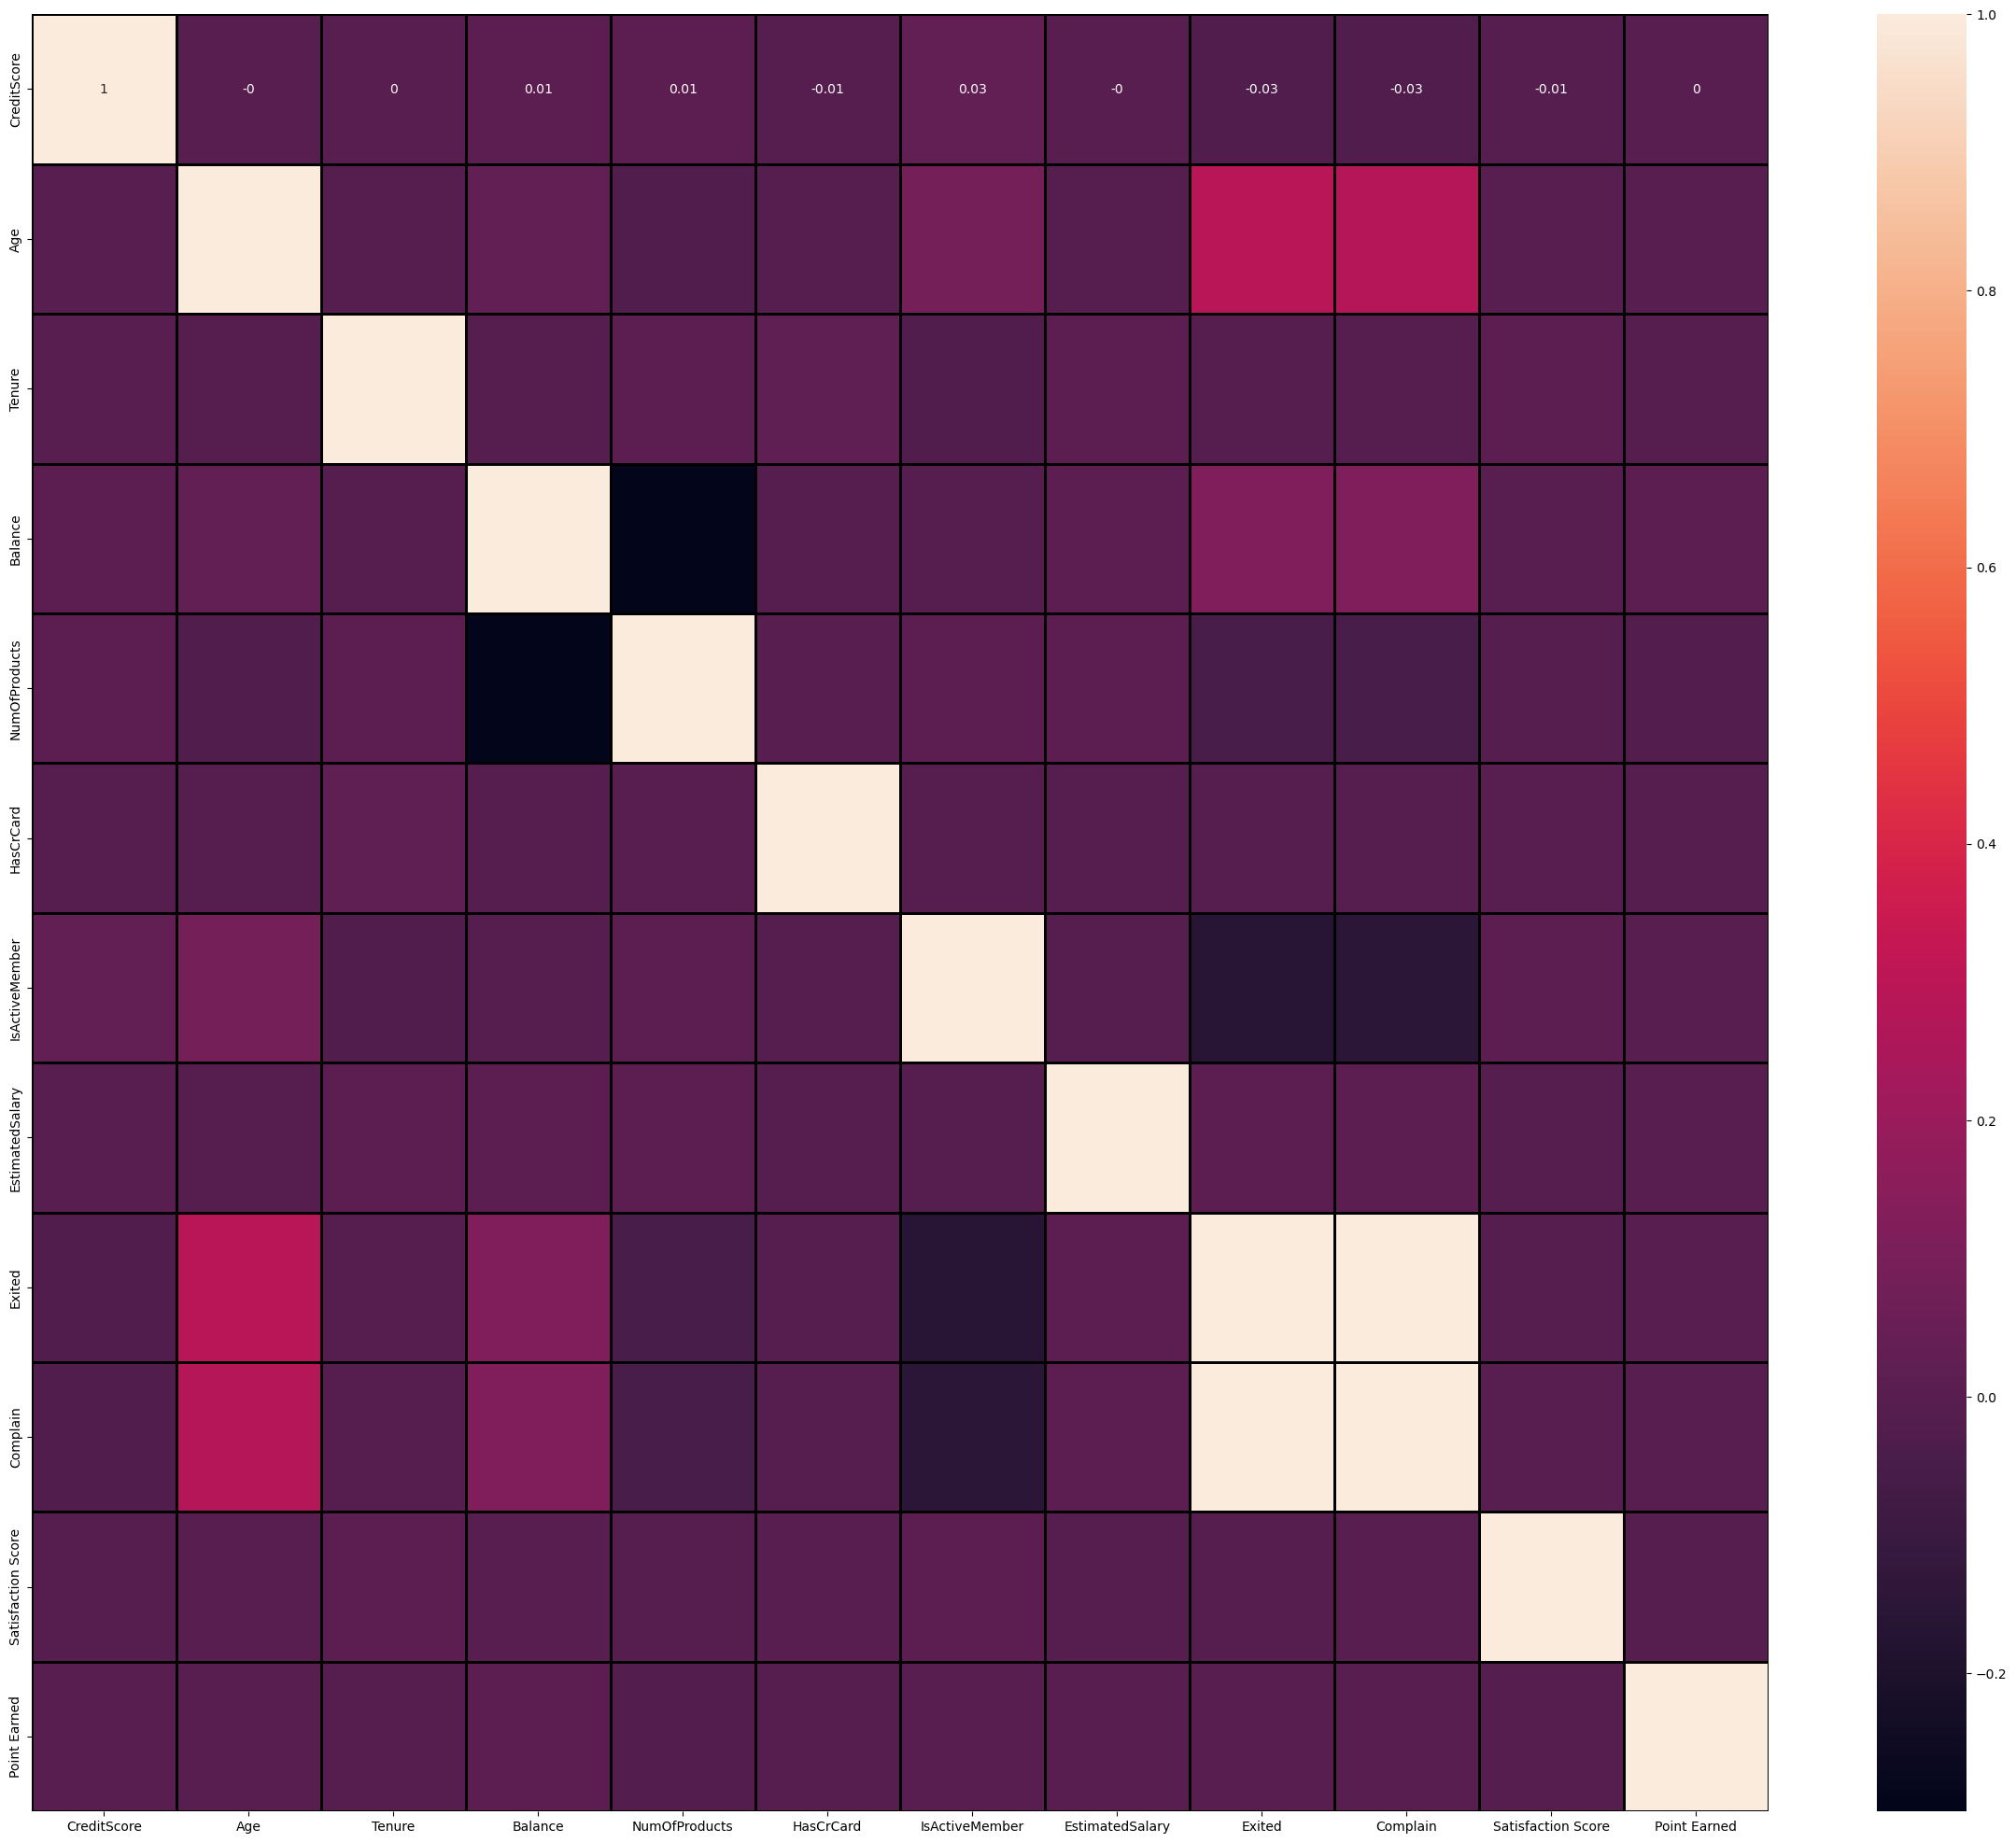

In [17]:
# Numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# correlation
corr = numeric_data.corr().round(2)

plt.figure(figsize=(30, 25)) 
sns.heatmap(corr,annot=True,  linewidths=1, linecolor='black')
plt.show()


#### OneHot Label Encoding

In [31]:
# 3 Object type exist: Gender, Geography, Card Type
columns_encode = ['Gender', 'Geography', 'Card Type']
encoded_df = pd.get_dummies(data, columns=columns_encode, dtype = int)

print(encoded_df.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Complain  ...  Point Earned  \
0               1        101348.88       1         1  ...           464   
1               1        112542.58       0         1  ...           456   
2               0        113931.57       1         1  ...           377   
3               0         93826.63       0         0  ...           350   
4               1         79084.10       0         0  ...           425   

   Gender_Female  Gender_Male  Geography_France  Geography_Germany  \
0              1            0                 1                  0   


#### Standard Scaling

In [24]:
# Separating "Exited"(Target variable) from feature variables

X = encoded_df.drop('Exited', axis = 1).values
X = X.values
y = encoded_df['Exited']

In [25]:
X

array([[619, 42, 2, ..., False, False, False],
       [608, 41, 1, ..., False, False, False],
       [502, 42, 8, ..., False, False, False],
       ...,
       [709, 36, 7, ..., False, False, True],
       [772, 42, 3, ..., True, False, False],
       [792, 28, 4, ..., False, False, False]], dtype=object)

In [29]:
sc = StandardScaler()
X_standard = sc.fit_transform(X)
X_standard

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57765819,
        -0.57658047, -0.57673443],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57765819,
        -0.57658047, -0.57673443],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57765819,
        -0.57658047, -0.57673443],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57765819,
        -0.57658047,  1.7339003 ],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.73112754,
        -0.57658047, -0.57673443],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57765819,
        -0.57658047, -0.57673443]])